### **Import necessary libraries** ###

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Read the data** ###

In [62]:
sale = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name = None)

### **Assign dataframe each sheet** ###

In [63]:
sale_df = sale['Sales Orders']
sale_customer = sale['Customers']
sale_region = sale['Regions']
sale_state_region = sale['State Regions']
sale_product = sale['Products']
sale_budget = sale['2017 Budgets']

In [64]:
print(f"The shape of sale_df is {sale_df.shape}")
print(f"The shape of sale_customer is {sale_customer.shape}")
print(f"The shape of sale_region is {sale_region.shape}")
print(f"The shape of sale_state_region is {sale_state_region.shape}")
print(f"The shape of sale_product is {sale_product.shape}")
print(f"The shape of sale_budget is {sale_budget.shape}")

The shape of sale_df is (64104, 12)
The shape of sale_customer is (175, 2)
The shape of sale_region is (994, 15)
The shape of sale_state_region is (49, 3)
The shape of sale_product is (30, 2)
The shape of sale_budget is (30, 2)


In [65]:
sale_state_region.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


### **Convert second rows as my header** ###

In [66]:
new_header = sale_state_region.iloc[0]
sale_state_region.columns = new_header
sale_state_region = sale_state_region[1:].reset_index(drop=True)

sale_state_region.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [67]:
sale_df.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [68]:
sale_customer.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [69]:
sale_region.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [70]:
sale_state_region.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [71]:
sale_product.isnull().sum()

,0
Index,0
Product Name,0


In [72]:
sale_budget.isnull().sum()

,0
Product Name,0
2017 Budgets,0


### **Data Cleaning & Wrangling** ###

In [73]:
# sale_df
# sale_customer
# sale_region
# sale_state_region
# sale_product
# sale_budget

In [74]:
sale_df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918


In [75]:
sale_customer.head(2)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group


In [76]:
# Join Sales and customer table
df = sale_df.merge(sale_customer,
                   how = 'left',
                   left_on='Customer Name Index',
                   right_on='Customer Index'
)

In [77]:
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd


In [78]:
sale_product.head(2)

,Index,Product Name
0,1,Product 1
1,2,Product 2


In [79]:
# Sales and customer table join product table
df = df.merge(sale_product,
              how='left',
              left_on='Product Description Index',
              right_on='Index'
)

In [80]:
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20


In [81]:
sale_region.head(2)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago


In [82]:
# Sales, customer & products table join region table
df = df.merge(sale_region,
              how='left',
              left_on='Delivery Region Index',
              right_on='id'
)

In [83]:
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis


In [84]:
sale_state_region.head(2)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South


In [85]:
# Sales, customer, product, region table join state_region table
df = df.merge(sale_state_region[['State Code','Region']],
              how='left',
              left_on='state_code',
              right_on='State Code'
)

In [86]:
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest


In [87]:
# Sales, customer, product, region, state_region join budget table
df = df.merge(sale_budget,
              how='left',
              on='Product Name')

In [88]:
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120


In [89]:
# df.to_csv('file.csv')

In [90]:
# Customer Index
# Index
# id
# State Code

# cleanup redundant columns
col_drop = ['Customer Index','Index','id','State Code']
df = df.drop(columns=col_drop,errors='ignore')

df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120


In [91]:
# convert all columns to lower case
df.columns = df.columns.str.lower()
df.head(2)

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,region,2017 budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120


In [92]:
df.columns

Index(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'region', '2017 budgets'],
      dtype='object')

In [93]:
# keep the important columns and delete the columns that we don't need

col_keep = ['ordernumber','orderdate','channel','order quantity','unit price','line total','total unit cost',
            'customer names','product name','county','state_code','state','latitude','longitude','region','2017 budgets']

In [94]:
df=df[col_keep]

In [95]:
df.head(2)

,ordernumber,orderdate,channel,order quantity,unit price,line total,total unit cost,customer names,product name,county,state_code,state,latitude,longitude,region,2017 budgets
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,32.08354,-81.09983,South,964940.231
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,IN,Indiana,39.61366,-86.10665,Midwest,2067108.120


In [96]:
# rename columns
df = df.rename(columns={
    'ordernumber':'order_num',
    'orderdate':'order_date',
    'channel':'channel',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'line total':'revenue',
    'total unit cost':'cost',
    'customer names':'customer_names',
    'product name':'product_name',
    'county':'county',
    'state_code':'state',
    'state':'state_name',
    'latitude':'lat',
    'longitude':'lon',
    'region':'region',
    '2017 budgets':'budgets'
})

df.head(2)

,order_num,order_date,channel,order_quantity,unit_price,revenue,cost,customer_names,product_name,county,state,state_name,lat,lon,region,budgets
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,32.08354,-81.09983,South,964940.231
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,IN,Indiana,39.61366,-86.10665,Midwest,2067108.120


In [97]:
# blank out budget for non 2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budgets']=pd.NA

# line total is revenue
df[['order_date','product_name','revenue','budgets']].head(5)

,order_date,product_name,revenue,budgets
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_num       64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   channel         64104 non-null  object        
 3   order_quantity  64104 non-null  int64         
 4   unit_price      64104 non-null  float64       
 5   revenue         64104 non-null  float64       
 6   cost            64104 non-null  float64       
 7   customer_names  64104 non-null  object        
 8   product_name    64104 non-null  object        
 9   county          64104 non-null  object        
 10  state           64104 non-null  object        
 11  state_name      64104 non-null  object        
 12  lat             64104 non-null  float64       
 13  lon             64104 non-null  float64       
 14  region          64104 non-null  object        
 15  bu

In [99]:
# filter the data to include only records from year 2017
df_2017 = df[df['order_date'].dt.year == 2017]

In [100]:
df.isnull().sum()

,0
order_num,0
order_date,0
channel,0
order_quantity,0
unit_price,0
revenue,0
cost,0
customer_names,0
product_name,0
county,0


In [101]:
df_2017.head()

,order_num,order_date,channel,order_quantity,unit_price,revenue,cost,customer_names,product_name,county,state,state_name,lat,lon,region,budgets
46363,SO - 0002544,2017-01-01,Wholesale,6,1239.5,7437.0,1028.785,NCS Group,Product 30,Hudson County,NJ,New Jersey,40.77955,-74.02375,Northeast,1011609.684
46364,SO - 0006431,2017-01-01,Wholesale,5,1829.1,9145.5,1207.206,Epic Group,Product 13,Mesa County,CO,Colorado,39.06387,-108.55065,West,3720639.645
46365,SO - 0007491,2017-01-01,Wholesale,9,2412.0,21708.0,1664.280,State Ltd,Product 15,Los Angeles County,CA,California,33.96168,-118.35313,West,3299478.315
46366,SO - 0008741,2017-01-01,Wholesale,8,904.5,7236.0,750.735,Fivebridge Ltd,Product 8,Dubuque County,IA,Iowa,42.50056,-90.66457,Midwest,1085037.329
46367,SO - 0009295,2017-01-01,Wholesale,12,1112.2,13346.4,811.906,Tagfeed Ltd,Product 2,Hernando County,FL,Florida,28.47689,-82.52546,South,3050087.565


### **Feature Engineering** ###

In [102]:
df['total_cost'] = df['order_quantity']*df['cost']

In [103]:
df['profit'] = df['revenue'] - df['total_cost']

df['profit_margin_pct'] = df['profit'] / df['revenue']*100

In [104]:
df.head(5)

,order_num,order_date,channel,order_quantity,unit_price,revenue,cost,customer_names,product_name,county,state,state_name,lat,lon,region,budgets,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,32.08354,-81.09983,South,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,IN,Indiana,39.61366,-86.10665,Midwest,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,CA,California,37.66243,-121.87468,West,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,IN,Indiana,39.16533,-86.52639,Midwest,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,CT,Connecticut,41.77524,-72.52443,Northeast,NaN,10082.160,8249.040,45.0


### **EDA** ###

### **Monthly Sales Revenue** ###

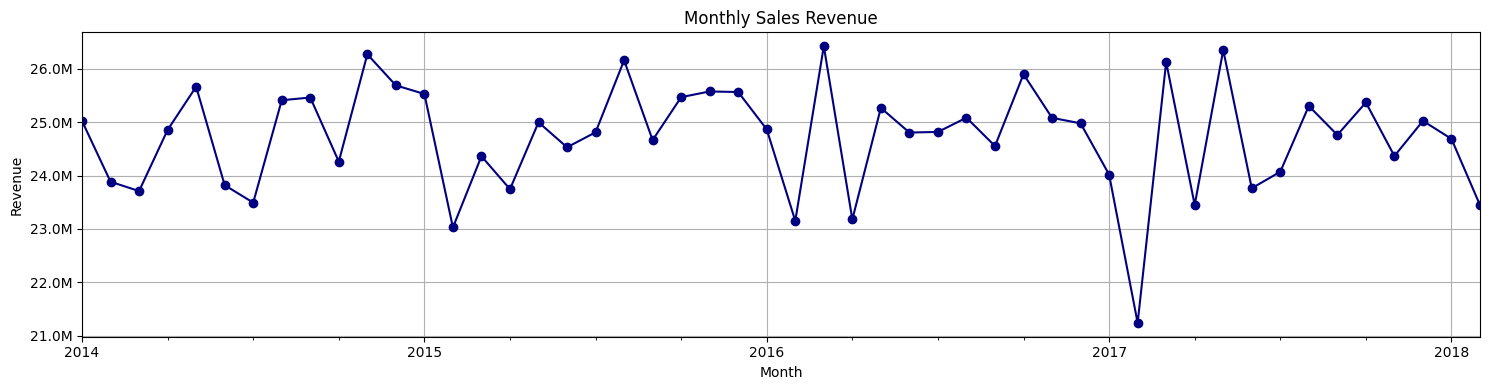

In [105]:
df['order_month'] = df['order_date'].dt.to_period('M')

monthly_sale = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15, 4))

monthly_sale.plot(marker='o',color='navy')
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
# df.head()

In [107]:
df['month'] = df['order_date'].dt.strftime('%b').str.lower()

In [108]:
df.head()

,order_num,order_date,channel,order_quantity,unit_price,revenue,cost,customer_names,product_name,county,...,state_name,lat,lon,region,budgets,total_cost,profit,profit_margin_pct,order_month,month
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,...,Georgia,32.08354,-81.09983,South,NaN,10946.058,4048.542,27.0,2014-01,jan
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,...,Indiana,39.61366,-86.10665,Midwest,NaN,13969.098,11899.602,46.0,2014-01,jan
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,...,California,37.66243,-121.87468,West,NaN,4108.440,1760.760,30.0,2014-01,jan
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,...,Indiana,39.16533,-86.52639,Midwest,NaN,7201.964,9166.136,56.0,2014-01,jan
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,...,Connecticut,41.77524,-72.52443,Northeast,NaN,10082.160,8249.040,45.0,2014-01,jan


### **Monthly Revenue Trend** ###

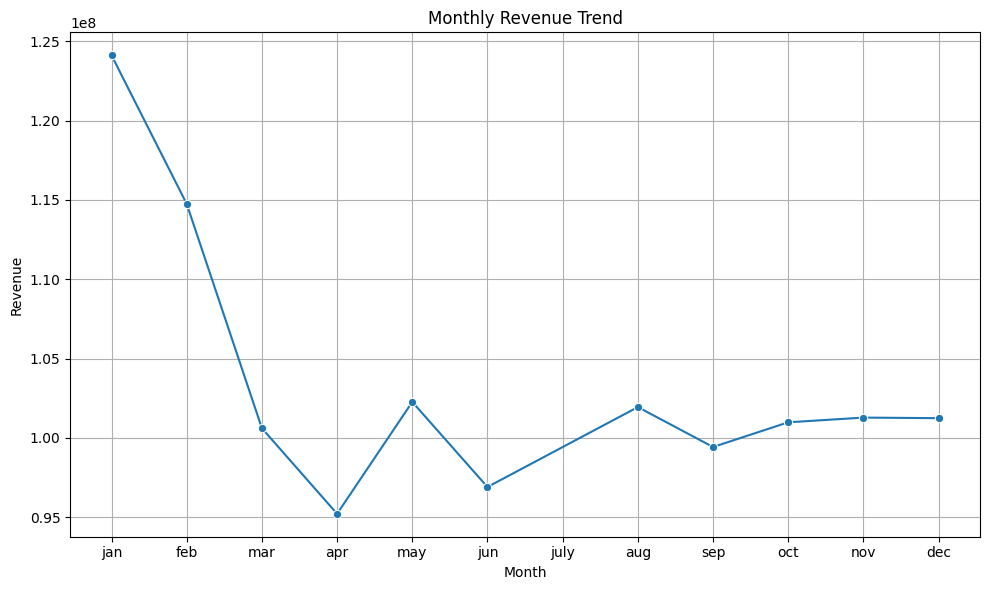

In [109]:
# aggregate revenue by month across all years
monthly_trend = df.groupby('month')['revenue'].sum().reset_index()

# sort month in calendet order
month_order = ['jan','feb','mar','apr','may','jun',
               'july','aug','sep','oct','nov','dec']

monthly_trend['month'] = pd.Categorical(monthly_trend['month'],
                                        categories=month_order,
                                        ordered=True)
monthly_trend = monthly_trend.sort_values('month')

# create a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='month', y='revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Top 10 Products by Revenue** ###

/tmp/ipython-input-110-1859555892.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='revenue', y='product_name', palette='viridis')


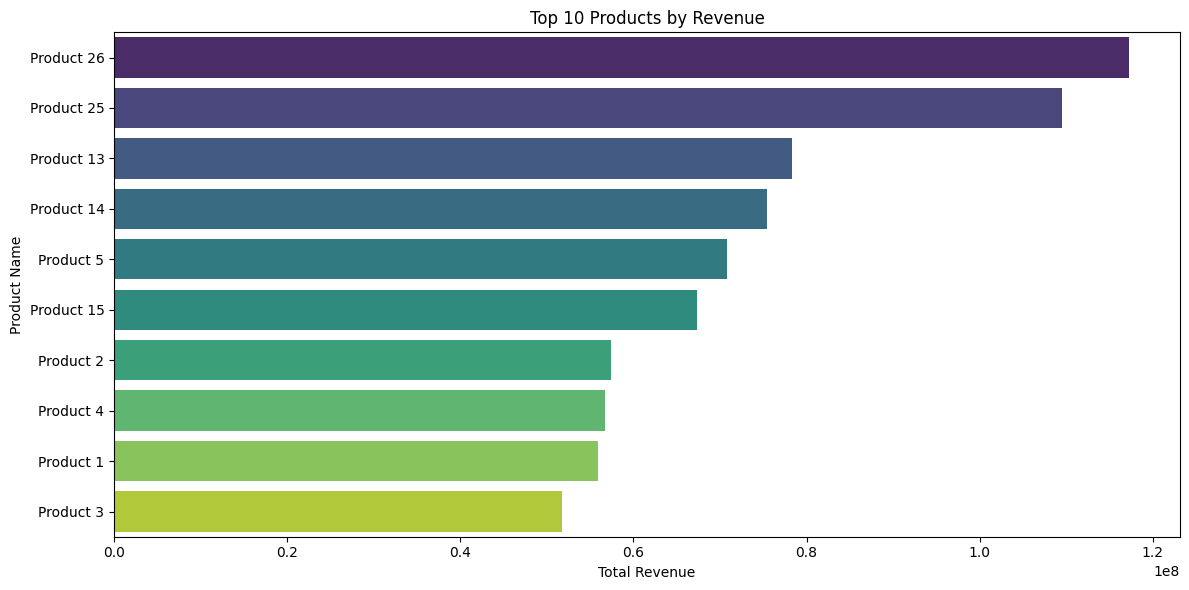

In [110]:
top_products = df.groupby('product_name')['revenue'].sum().reset_index()

# Step 2: Sort by revenue descending and pick top 10
top_products = top_products.sort_values(by='revenue', ascending=False).head(10)

# Step 3: Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='revenue', y='product_name', palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

### **Sales Distribution by Channel** ###

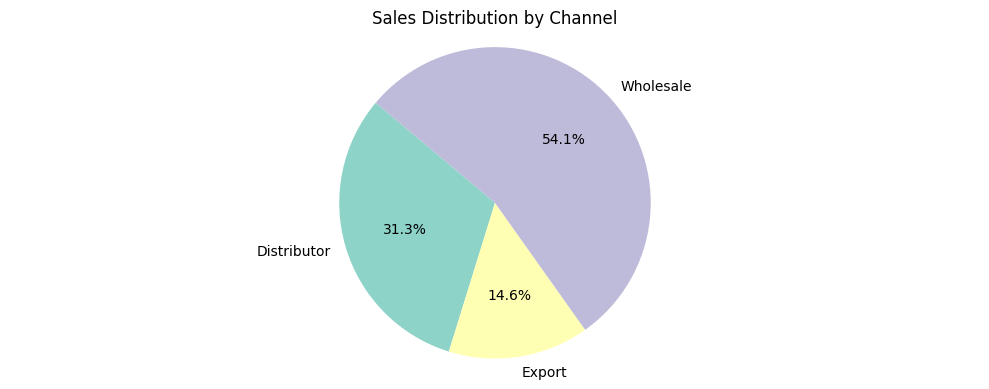

In [111]:
 channel_sales = df.groupby('channel')['revenue'].sum()

# Step 2: Plot the pie chart
plt.figure(figsize=(10, 4))
plt.pie(channel_sales, labels=channel_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Sales Distribution by Channel')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.tight_layout()
plt.show()

### **Average Order Value Distribution** ###

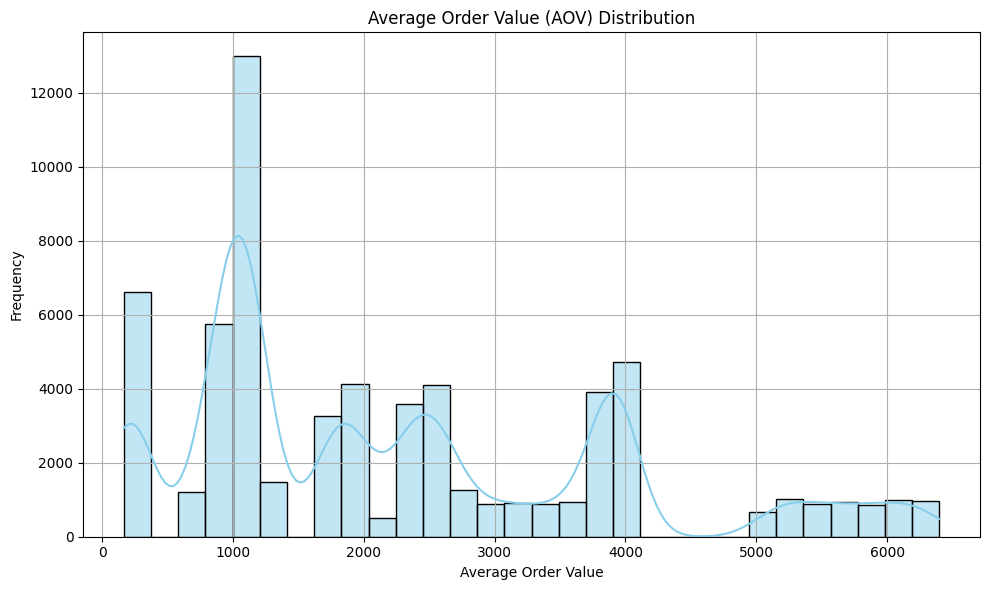

In [112]:
df['aov'] = df['revenue'] / df['order_quantity']

# Step 2: Optional – Remove outliers (e.g., AOV > 99th percentile)
df_filtered = df[df['aov'] < df['aov'].quantile(0.99)]

# Step 3: Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['aov'], bins=30, kde=True, color='skyblue')
plt.title('Average Order Value (AOV) Distribution')
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Unit Price Distribution per Product** ###

/tmp/ipython-input-113-3052866291.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='product_name', y='unit_price', palette='Set2')


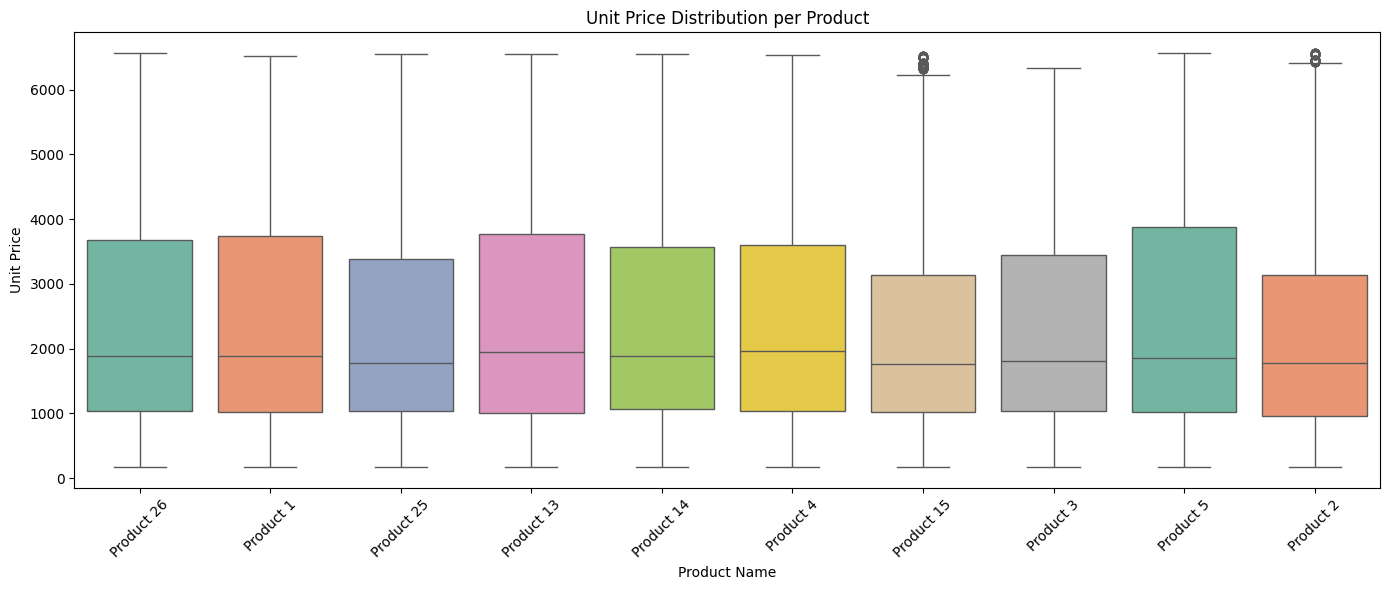

In [113]:
top_products = df['product_name'].value_counts().head(10).index
df_top = df[df['product_name'].isin(top_products)]

# Plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top, x='product_name', y='unit_price', palette='Set2')
plt.title('Unit Price Distribution per Product')
plt.xlabel('Product Name')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Top 10 States by Revenue and Order Count** ###

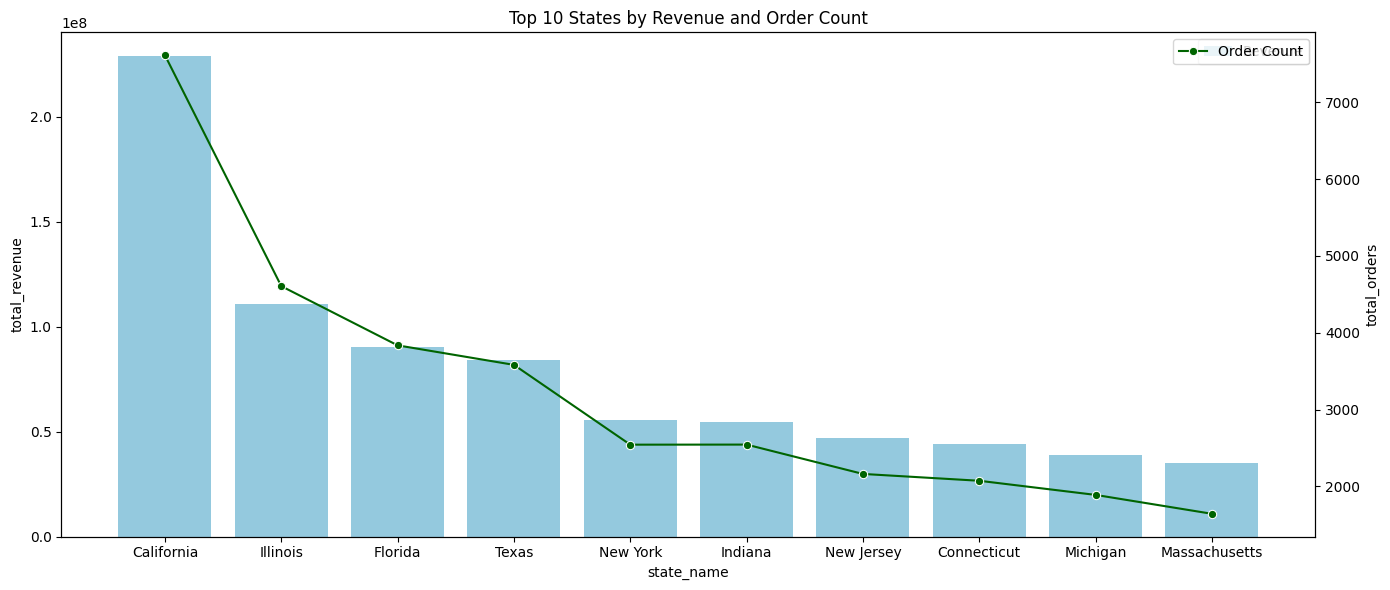

In [114]:
# Group by state and aggregate revenue and order count
state_summary = df.groupby('state_name').agg(
    total_revenue=('revenue', 'sum'),
    total_orders=('order_num', 'nunique')  # Assuming each order_num is unique
).reset_index()

# Sort by revenue and select top 10
top_states = state_summary.sort_values(by='total_revenue', ascending=False).head(10)

plt.figure(figsize=(14, 6))
# Plot revenue
sns.barplot(data=top_states, x='state_name', y='total_revenue', color='skyblue', label='Revenue')

# Plot order count on same chart (twin axis)
ax2 = plt.gca().twinx()
sns.lineplot(data=top_states, x='state_name', y='total_orders', marker='o', color='darkgreen', label='Order Count', ax=ax2)

plt.title('Top 10 States by Revenue and Order Count')
plt.xlabel('State Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Average Profit Margin by Channel** ###

/tmp/ipython-input-115-4577547.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_margin_by_channel, x='channel', y='profit_margin_pct', palette='coolwarm')


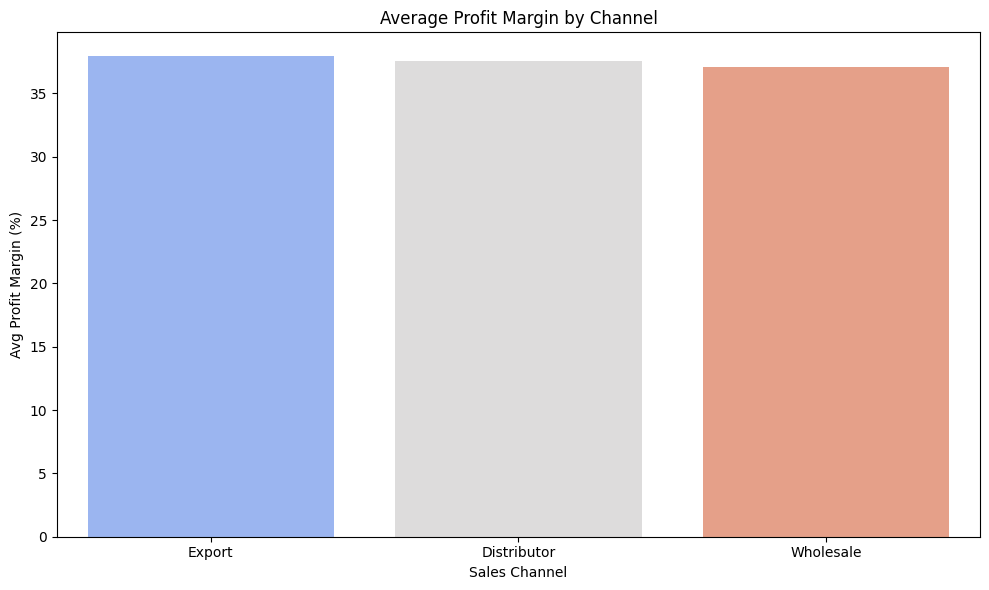

In [115]:
# Step 1: Ensure 'profit_margin_pct' is a numeric column (if needed)
df['profit_margin_pct'] = pd.to_numeric(df['profit_margin_pct'], errors='coerce')

# Step 2: Group by channel and calculate average profit margin
avg_margin_by_channel = df.groupby('channel')['profit_margin_pct'].mean().reset_index()

# Step 3: Optional - sort by margin descending
avg_margin_by_channel = avg_margin_by_channel.sort_values(by='profit_margin_pct', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_margin_by_channel, x='channel', y='profit_margin_pct', palette='coolwarm')
plt.title('Average Profit Margin by Channel')
plt.ylabel('Avg Profit Margin (%)')
plt.xlabel('Sales Channel')
plt.tight_layout()
plt.show()

### **Top and Bottom 10 Customer by Revenue** ###

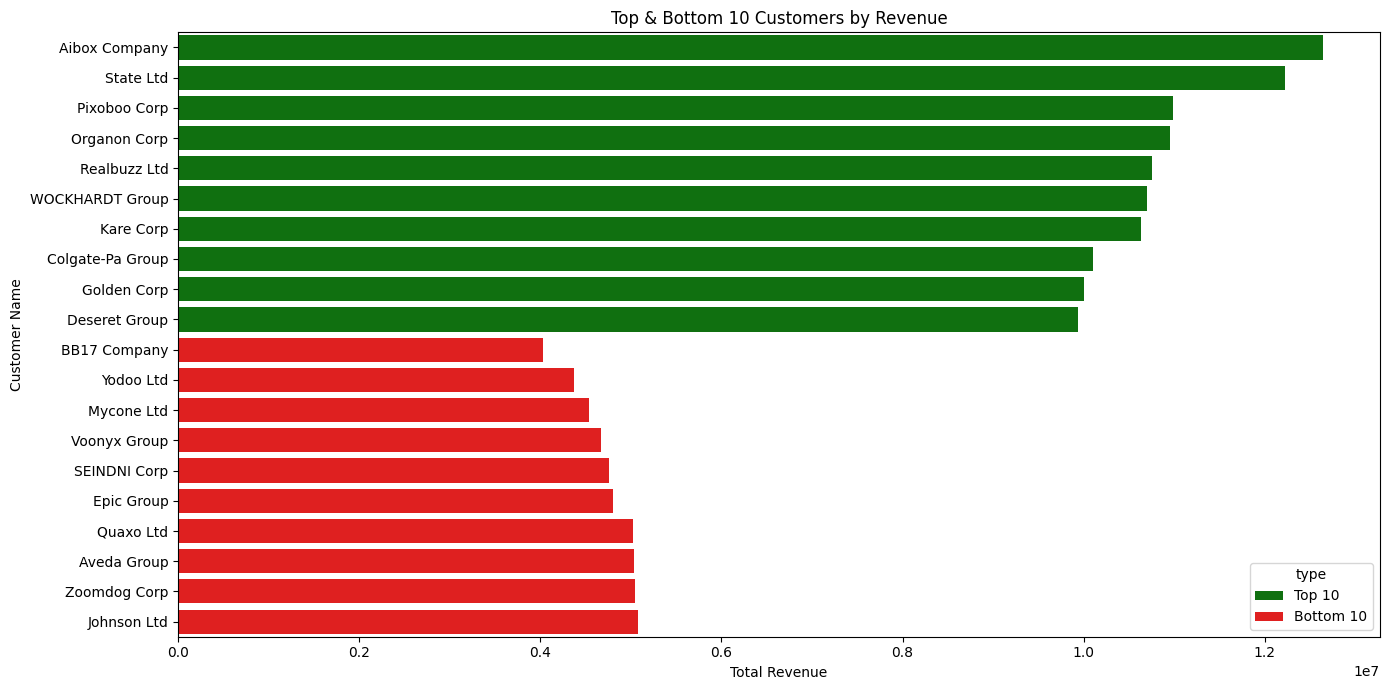

In [116]:
# Step 1: Group by customer and calculate total revenue
customer_revenue = df.groupby('customer_names')['revenue'].sum().reset_index()

# Step 2: Sort by revenue
top_10_customers = customer_revenue.sort_values(by='revenue', ascending=False).head(10)
bottom_10_customers = customer_revenue.sort_values(by='revenue', ascending=True).head(10)

# Combine top and bottom with a new label
top_10_customers['type'] = 'Top 10'
bottom_10_customers['type'] = 'Bottom 10'
combined = pd.concat([top_10_customers, bottom_10_customers])

plt.figure(figsize=(14, 7))
sns.barplot(data=combined, x='revenue', y='customer_names', hue='type', dodge=False, palette={'Top 10': 'green', 'Bottom 10': 'red'})
plt.title('Top & Bottom 10 Customers by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

### **Regional Revenue & Profitability Analysis** ###

In [120]:
df.columns

Index(['order_num', 'order_date', 'channel', 'order_quantity', 'unit_price',
       'revenue', 'cost', 'customer_names', 'product_name', 'county', 'state',
       'state_name', 'lat', 'lon', 'region', 'budgets', 'total_cost', 'profit',
       'profit_margin_pct', 'order_month', 'month', 'aov'],
      dtype='object')

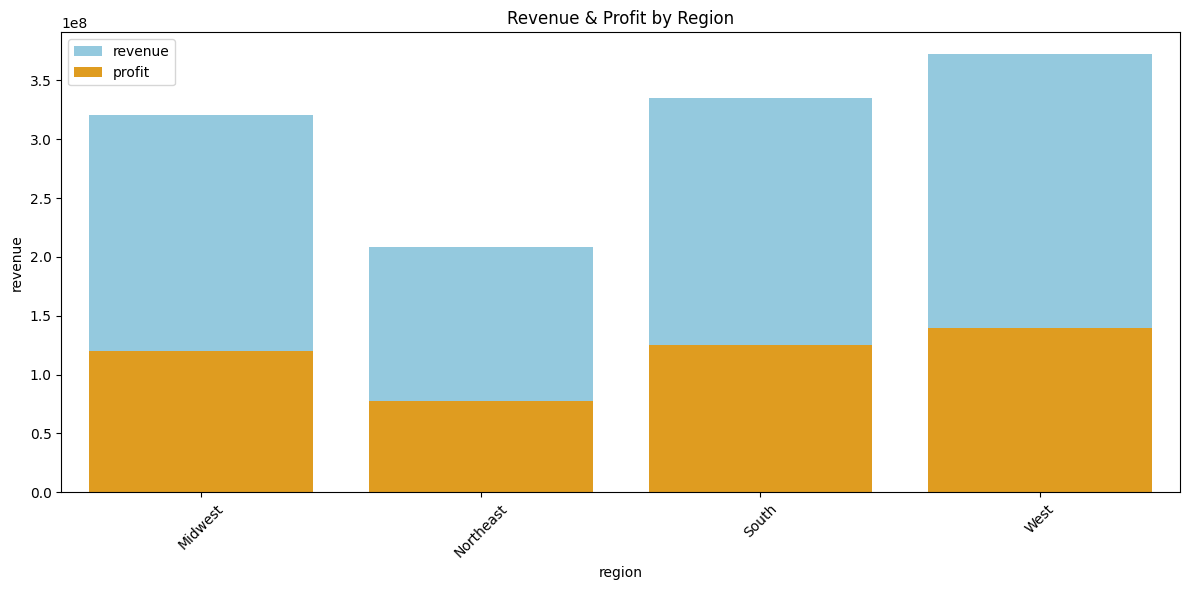

In [122]:
region_summary = df.groupby('region')[['revenue','profit']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=region_summary, x='region', y='revenue', color='skyblue', label='revenue')
sns.barplot(data=region_summary, x='region', y='profit', color='orange', label='profit')
plt.title('Revenue & Profit by Region')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Seasonality (Monthly Revenue Trend)** ###

In [124]:
df['Year'] = df['order_date'].dt.year

In [126]:
df.columns

Index(['order_num', 'order_date', 'channel', 'order_quantity', 'unit_price',
       'revenue', 'cost', 'customer_names', 'product_name', 'county', 'state',
       'state_name', 'lat', 'lon', 'region', 'budgets', 'total_cost', 'profit',
       'profit_margin_pct', 'order_month', 'month', 'aov', 'Year'],
      dtype='object')

/tmp/ipython-input-129-1016777395.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_summary, x='channel', y='profit', palette='coolwarm')


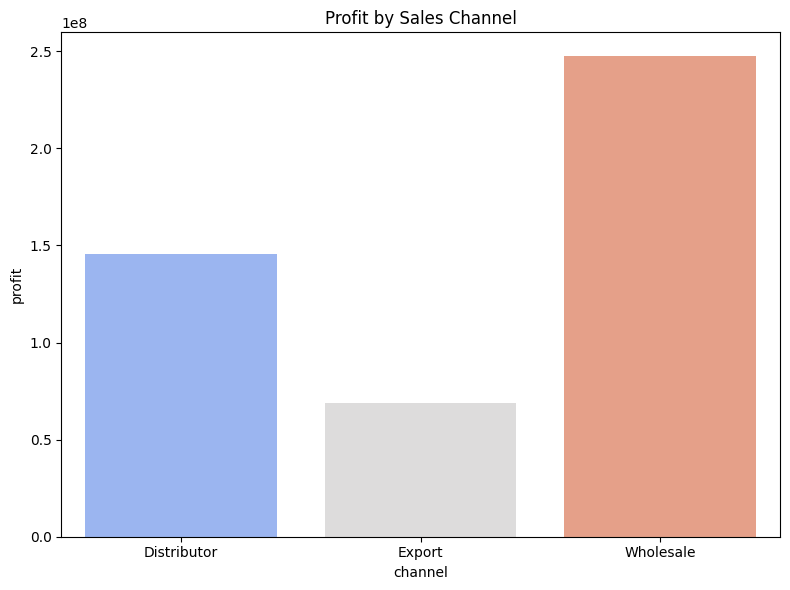

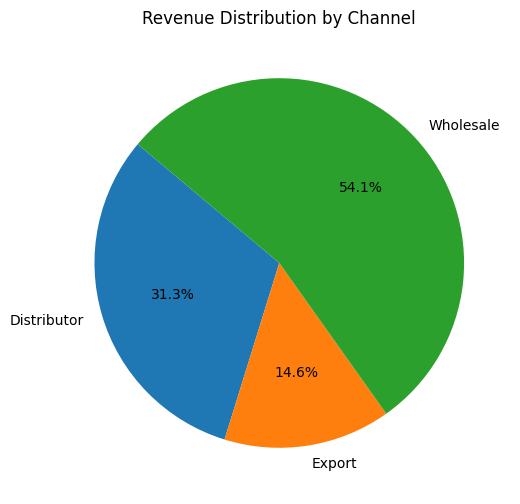

In [129]:
channel_summary = df.groupby('channel')[['revenue','profit']].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=channel_summary, x='channel', y='profit', palette='coolwarm')
plt.title('Profit by Sales Channel')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.pie(channel_summary['revenue'], labels=channel_summary['channel'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution by Channel')
plt.show()

### **Year-over-Year Growth Trend** ###

In [130]:
df.columns

Index(['order_num', 'order_date', 'channel', 'order_quantity', 'unit_price',
       'revenue', 'cost', 'customer_names', 'product_name', 'county', 'state',
       'state_name', 'lat', 'lon', 'region', 'budgets', 'total_cost', 'profit',
       'profit_margin_pct', 'order_month', 'month', 'aov', 'Year'],
      dtype='object')

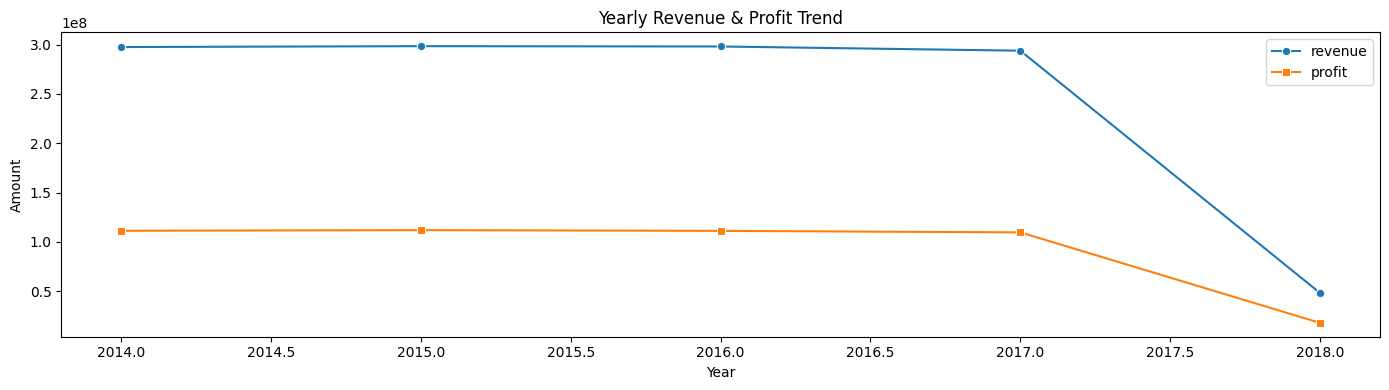

In [138]:
year_trend = df.groupby('Year')[['revenue','profit']].sum().reset_index()

plt.figure(figsize=(14, 4))
sns.lineplot(data=year_trend, x='Year', y='revenue', label='revenue', marker='o')
sns.lineplot(data=year_trend, x='Year', y='profit', label='profit', marker='s')

plt.title('Yearly Revenue & Profit Trend')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()

In [116]:
3

### **Customer Segmentation Revenue vs Profit Margin** ###

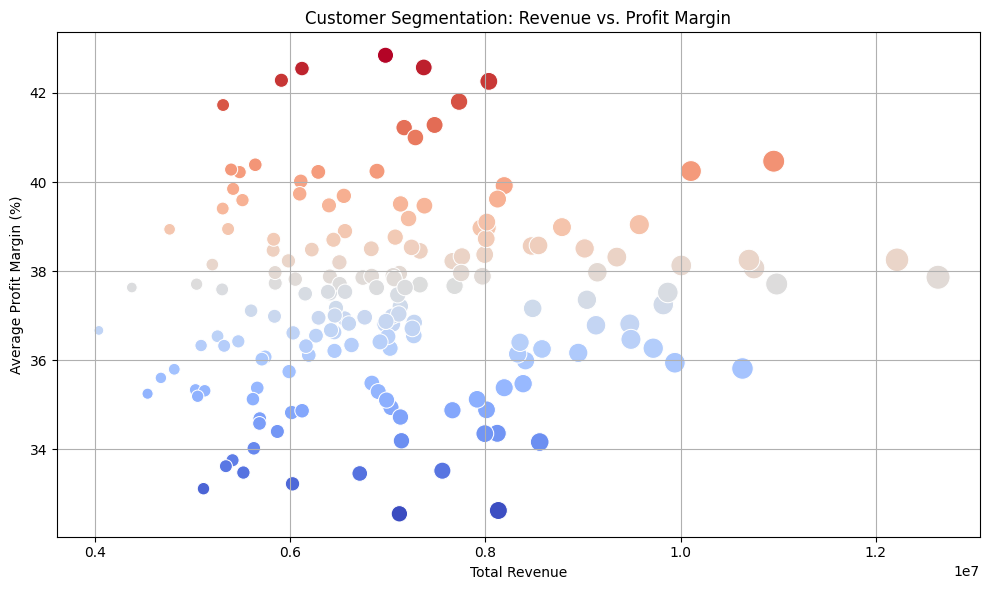

In [117]:
#  Step 1: Aggregate data per customer
customer_seg = df.groupby('customer_names').agg(
    total_revenue=('revenue', 'sum'),
    avg_profit_margin=('profit_margin_pct', 'mean')
).reset_index()

# Step 2: Optional – remove customers with zero or NaN values
customer_seg = customer_seg.dropna()
customer_seg = customer_seg[(customer_seg['total_revenue'] > 0) & (customer_seg['avg_profit_margin'] > 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_seg, x='total_revenue', y='avg_profit_margin', hue='avg_profit_margin',
                palette='coolwarm', size='total_revenue', sizes=(50, 300), legend=False)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue')
plt.ylabel('Average Profit Margin (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

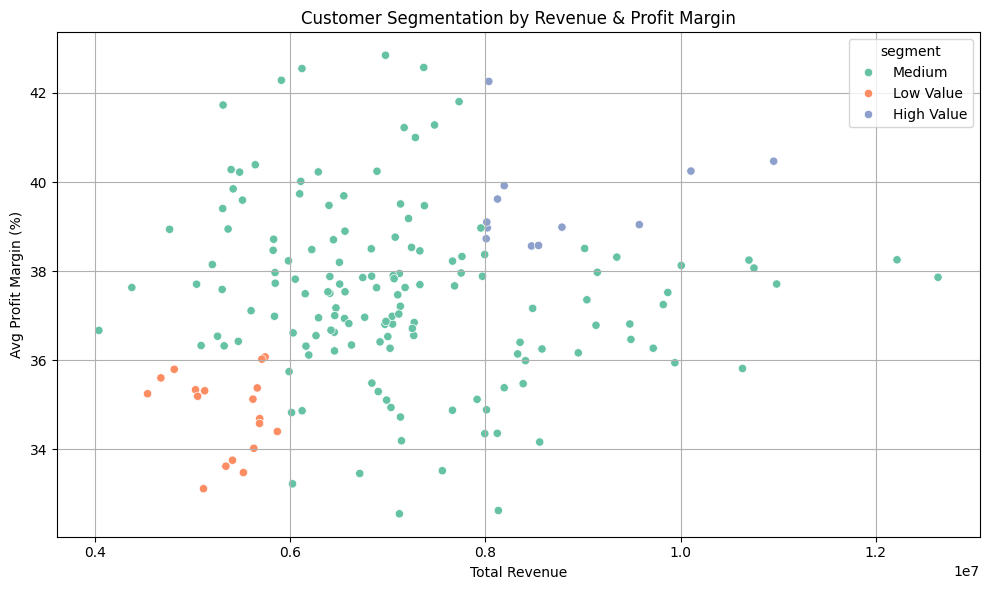

In [118]:
def segment_customer(row):
    if row['total_revenue'] >= customer_seg['total_revenue'].quantile(0.75) and row['avg_profit_margin'] >= customer_seg['avg_profit_margin'].quantile(0.75):
        return 'High Value'
    elif row['total_revenue'] < customer_seg['total_revenue'].quantile(0.25) and row['avg_profit_margin'] < customer_seg['avg_profit_margin'].quantile(0.25):
        return 'Low Value'
    else:
        return 'Medium'

customer_seg['segment'] = customer_seg.apply(segment_customer, axis=1)

# Plot with segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_seg, x='total_revenue', y='avg_profit_margin', hue='segment', palette='Set2')
plt.title('Customer Segmentation by Revenue & Profit Margin')
plt.xlabel('Total Revenue')
plt.ylabel('Avg Profit Margin (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


### **Correlation Heatmap of Numeric Features** ###

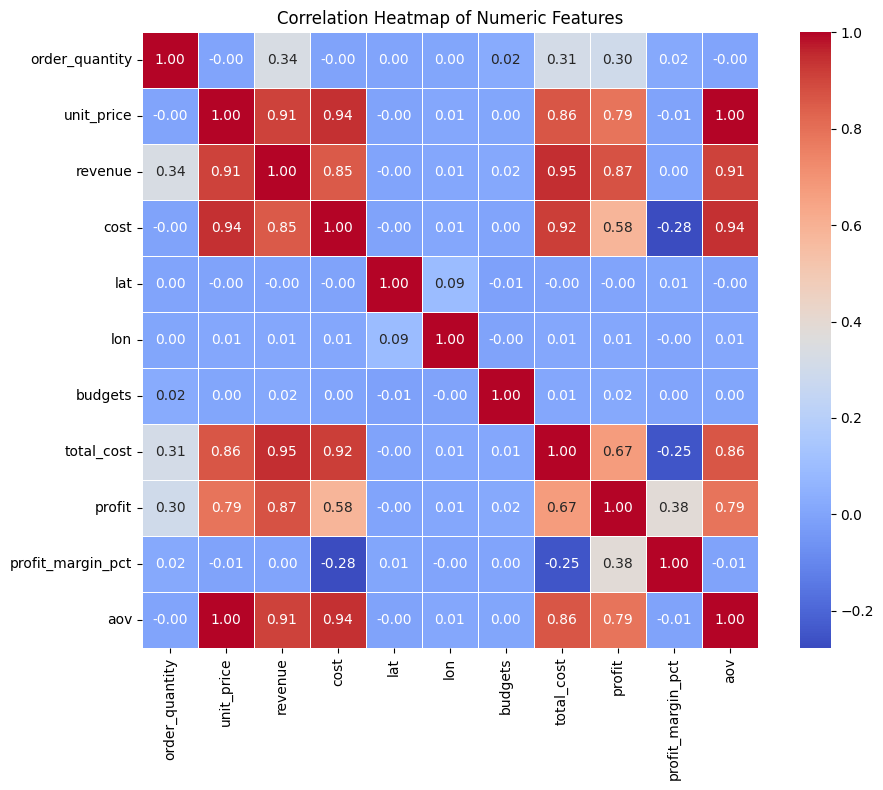

In [119]:
# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Step 2: Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()